

**Import libraries**

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils

**Load the  dataset into Training and Testing sets**

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.

4431872/4422102 [==============================] - 0s 0us/step


**Reshape and normalize the images**


In [ ]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

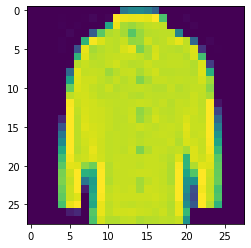

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[14])

**One hot encoding **

In [ ]:
# One hot encoding is used to convert categorical data to integer data ( numerical input and output variables are required)

trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

Build the model with Keras layers

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu')) #Conv2D layer with 32 filters  with relu activation function
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu')) ##Conv2D layer with 64 filters  with relu activation function
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2)) #to prevent any overfitting we add a dropout regularization layer with ratio 0.2 
classifier.add(Dense(units=10, activation='softmax')) #softmax layer with the 10 classes as output

In [ ]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


**Model Summary**

In [ ]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history = classifier.fit(trainX, trainY,
 batch_size=128, epochs=20,
 verbose=2,
 validation_data=(testX, testY))

Epoch 1/20
469/469 - 44s - loss: 0.5694 - accuracy: 0.7955 - val_loss: 0.4023 - val_accuracy: 0.8503 - 44s/epoch - 93ms/step
Epoch 2/20
469/469 - 43s - loss: 0.3664 - accuracy: 0.8669 - val_loss: 0.3438 - val_accuracy: 0.8753 - 43s/epoch - 91ms/step
Epoch 3/20
469/469 - 43s - loss: 0.3165 - accuracy: 0.8844 - val_loss: 0.3146 - val_accuracy: 0.8839 - 43s/epoch - 91ms/step
Epoch 4/20
469/469 - 43s - loss: 0.2856 - accuracy: 0.8944 - val_loss: 0.2834 - val_accuracy: 0.8959 - 43s/epoch - 91ms/step
Epoch 5/20
469/469 - 43s - loss: 0.2592 - accuracy: 0.9042 - val_loss: 0.2829 - val_accuracy: 0.8951 - 43s/epoch - 91ms/step
Epoch 6/20
469/469 - 43s - loss: 0.2437 - accuracy: 0.9095 - val_loss: 0.2579 - val_accuracy: 0.9057 - 43s/epoch - 91ms/step
Epoch 7/20
469/469 - 42s - loss: 0.2262 - accuracy: 0.9167 - val_loss: 0.2539 - val_accuracy: 0.9045 - 42s/epoch - 90ms/step
Epoch 8/20
469/469 - 43s - loss: 0.2117 - accuracy: 0.9218 - val_loss: 0.2506 - val_accuracy: 0.9078 - 43s/epoch - 91ms/step


In [ ]:
	classifier.save('final_model.h5')
